<a href="https://colab.research.google.com/github/igomez666/LLM/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP a la vieja usanza

Vamos a analizar textos sin utilizar LLMs.

# 1 - Analisis de textos

Creamos un texto de ejemplo y lo cargamos en spacy

In [1]:
!python -m spacy download es_core_news_sm
import spacy
import es_core_news_sm
sp = es_core_news_sm.load()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Word tokenization

texto = """María tenía un corderito blanco como la nieve. Los tipos que fuman puro tienen cara de canguro.
Nunca vi a un corderito fumar en puro. La nieve es blanca y suave."""

doc = sp(texto)



In [3]:
# Tokens de palabra
token_list = []
for token in doc:
    token_list.append(token.text)
print(token_list)


# Tokens de frase
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

['María', 'tenía', 'un', 'corderito', 'blanco', 'como', 'la', 'nieve', '.', 'Los', 'tipos', 'que', 'fuman', 'puro', 'tienen', 'cara', 'de', 'canguro', '.', '\n', 'Nunca', 'vi', 'a', 'un', 'corderito', 'fumar', 'en', 'puro', '.', 'La', 'nieve', 'es', 'blanca', 'y', 'suave', '.']
['María tenía un corderito blanco como la nieve.', 'Los tipos que fuman puro tienen cara de canguro.\n', 'Nunca vi a un corderito fumar en puro.', 'La nieve es blanca y suave.']


In [4]:
#Stop words

import spacy
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS


print('Numero de stop words: %d' % len(spacy_stopwords))
print('Primeros 10 stop words: %s' % list(spacy_stopwords)[:10])


#Lo aplicamos a nuestro texto
texto_filtrado=[]

# filtrando
for word in doc:
    if word.is_stop==False:
        texto_filtrado.append(word)
print("Resultado:",texto_filtrado)

Numero de stop words: 521
Primeros 10 stop words: ['eramos', 'mis', 'todavía', 'tus', 'ésa', 'cuenta', 'misma', 'pocas', 'repente', 'dicho']
Resultado: [María, corderito, blanco, nieve, ., tipos, fuman, puro, cara, canguro, ., 
, vi, corderito, fumar, puro, ., nieve, blanca, suave, .]


In [5]:
total_lemmas=[]
for word in doc:
        print(word.text + '  ===>', word.lemma_)
        lemmas=word.lemma_
        total_lemmas.append(lemmas)

María  ===> María
tenía  ===> tener
un  ===> uno
corderito  ===> corderito
blanco  ===> blanco
como  ===> como
la  ===> el
nieve  ===> nieve
.  ===> .
Los  ===> el
tipos  ===> tipo
que  ===> que
fuman  ===> fumar
puro  ===> puro
tienen  ===> tener
cara  ===> cara
de  ===> de
canguro  ===> canguro
.  ===> .

  ===> 

Nunca  ===> nunca
vi  ===> ver
a  ===> a
un  ===> uno
corderito  ===> corderito
fumar  ===> fumar
en  ===> en
puro  ===> puro
.  ===> .
La  ===> el
nieve  ===> nieve
es  ===> ser
blanca  ===> blanco
y  ===> y
suave  ===> suave
.  ===> .


In [6]:
for word in doc:
    print(word.text,word.pos_)

María PROPN
tenía VERB
un DET
corderito NOUN
blanco ADJ
como SCONJ
la DET
nieve NOUN
. PUNCT
Los DET
tipos NOUN
que PRON
fuman VERB
puro ADJ
tienen VERB
cara NOUN
de ADP
canguro NOUN
. PUNCT

 SPACE
Nunca ADV
vi VERB
a ADP
un DET
corderito NOUN
fumar VERB
en ADP
puro NOUN
. PUNCT
La DET
nieve NOUN
es AUX
blanca ADJ
y CCONJ
suave ADJ
. PUNCT


In [7]:
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

nytimes= nlp(u"""New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases.

At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday.

The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.""")

entities=[(i, i.label_, i.label) for i in nytimes.ents]
entities


[(New York City, 'GPE', 384),
 (Tuesday, 'DATE', 391),
 (At least 285, 'CARDINAL', 397),
 (September, 'DATE', 391),
 (Brooklyn, 'GPE', 384),
 (Williamsburg, 'GPE', 384),
 (four, 'CARDINAL', 397),
 (Zip, 'PERSON', 380),
 (Bill de Blasio, 'PERSON', 380),
 (Tuesday, 'DATE', 391),
 (Orthodox, 'NORP', 381),
 (Jews, 'NORP', 381),
 (as young as 6 months old, 'DATE', 391),
 (up to $1,000, 'MONEY', 394)]

In [8]:
displacy.render(nytimes, style = "ent",jupyter = True)

In [9]:

nlp = en_core_web_sm.load()



docp = nlp ("La casa de mi madre es vieja y enorme")

for chunk in docp.noun_chunks:
   print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

displacy.render(docp, style="dep", jupyter= True)

La casa casa ROOT casa
de mi mi appos casa
madre es es appos casa


#2 - Clasificación de textos

Cargamos el dataset. Contiene textos escritos por tres autores diferentes de la misma época y estilo literario:

* Edgar Alan Poe (EAP)
* H.P. Lovecraft (HPL)
* Mary Shelley (MWS)

El objetivo es entrenar un modelo que se capaz de reconocer entre estos tres el autor de un texto

In [10]:
import pandas as pd
train = pd.read_csv("train.csv")

train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [11]:
print(train.shape)

print(train['author'].value_counts())

(19579, 3)
author
EAP    7900
MWS    6044
HPL    5635
Name: count, dtype: int64


### Calcular los embeddings

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

corpus = [
          'María tenía un corderito blanco como la nieve',
          'Los tipos que fuman puro tienen cara de canguro',
          'Nunca vi a un corderito fumar en puro',
          'La nieve es blanca y suave',
 ]

vectorizer = TfidfVectorizer()
vectorizer2 = CountVectorizer()

# TD-IDF Matrix
X = vectorizer.fit_transform(corpus)
X2 = vectorizer2.fit_transform(corpus)

# extracting feature names
count_tokens = vectorizer.get_feature_names_out()
tfidf_tokens = vectorizer2.get_feature_names_out()

print(count_tokens)
print(tfidf_tokens)


['blanca' 'blanco' 'canguro' 'cara' 'como' 'corderito' 'de' 'en' 'es'
 'fuman' 'fumar' 'la' 'los' 'maría' 'nieve' 'nunca' 'puro' 'que' 'suave'
 'tenía' 'tienen' 'tipos' 'un' 'vi']
['blanca' 'blanco' 'canguro' 'cara' 'como' 'corderito' 'de' 'en' 'es'
 'fuman' 'fumar' 'la' 'los' 'maría' 'nieve' 'nunca' 'puro' 'que' 'suave'
 'tenía' 'tienen' 'tipos' 'un' 'vi']


In [ ]:
X2.toarray()

array([[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0]])

In [ ]:
X.toarray()

array([[0.        , 0.39264414, 0.        , 0.        , 0.39264414,
        0.30956515, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30956515, 0.        , 0.39264414, 0.30956515,
        0.        , 0.        , 0.        , 0.        , 0.39264414,
        0.        , 0.        , 0.30956515, 0.        ],
       [0.        , 0.        , 0.34056989, 0.34056989, 0.        ,
        0.        , 0.34056989, 0.        , 0.        , 0.34056989,
        0.        , 0.        , 0.34056989, 0.        , 0.        ,
        0.        , 0.26850921, 0.34056989, 0.        , 0.        ,
        0.34056989, 0.34056989, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.32555709, 0.        , 0.41292788, 0.        , 0.        ,
        0.41292788, 0.        , 0.        , 0.        , 0.        ,
        0.41292788, 0.32555709, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32555709, 0.41292788],
       [0.485

In [ ]:
tfidf_tokens

array(['blanca', 'blanco', 'canguro', 'cara', 'como', 'corderito', 'de',
       'en', 'es', 'fuman', 'fumar', 'la', 'los', 'maría', 'nieve',
       'nunca', 'puro', 'que', 'suave', 'tenía', 'tienen', 'tipos', 'un',
       'vi'], dtype=object)

In [ ]:
# prompt: repite el clasificador con logistic regresion

from sklearn.linear_model import LogisticRegression

# ... (Your existing code for data preparation, including LabelEncoder) ...

# Utilizar CountVectorizer para convertir el texto en características numéricas
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_vec, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = model.predict(X_val_vec)

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred)
print("Precisión del modelo (Regresión Logística):", accuracy)


Precisión del modelo (Regresión Logística): 0.8186925434116445


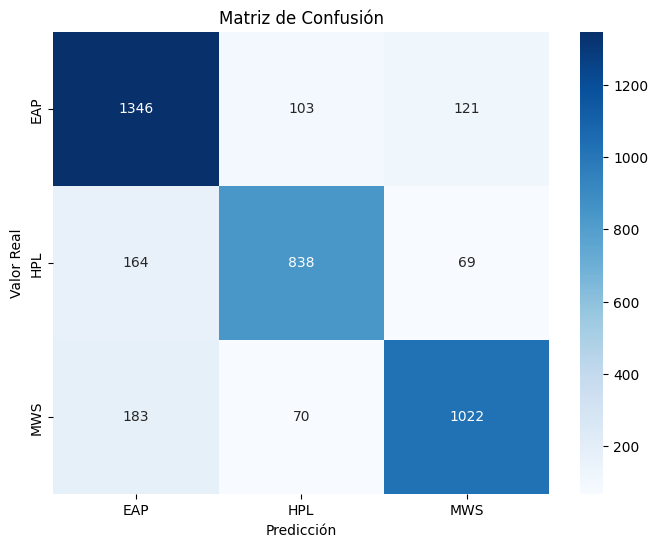

In [ ]:
# prompt: dibuja la matriz de confusion

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_val (true labels) and y_pred (predicted labels)

cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


In [ ]:
nlp = en_core_web_sm.load()
# Función para preprocesar textos
def preprocess_text(text):
    doc = nlp(text)
    # Lematizar y eliminar stop words y puntuación
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)  # Unir tokens en un solo string

# Preprocesar todos los textos
preprocessed_texts = [preprocess_text(text) for text in train['text']]

# Actualizar los datos en el DataFrame
train['preprocessed_text'] = preprocessed_texts

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador
vectorizer = TfidfVectorizer()

# Convertir los textos en una matriz de características
X = vectorizer.fit_transform(preprocessed_texts)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, train['author'], test_size=0.25, random_state=42)

# Crear y entrenar el modelo de regresión logística
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 78.86%


In [ ]:
! pip install scikit-learn gensim nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [13]:
from sklearn.model_selection import train_test_split # Import train_test_split from the correct submodule

X=train['text']
Y=train['author']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [15]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [16]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Download the 'stopwords' resource
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#! pip install gensim
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [19]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 102.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [20]:
!pip install --upgrade gensim

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
